In [2]:
import numpy as np
import pandas as pd

# Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers


# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

# to display all columns:
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


## Read Normalised Dataset

In [4]:
train_ = pd.read_csv('./data/normalised.csv')
train = train_.copy()

In [26]:
# Create a simple NN 
# Build neural network in Keras
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=11))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# lets drop the predictor column
predictors = train.drop(['Dataset', 'Gender'], axis=1)

In [28]:
# Any nan rows are replaced with column mean
predictors.fillna(predictors.mean(), inplace=True)

In [29]:
target = train["Dataset"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.20, random_state = 0)
x_train.shape

(466, 11)

In [30]:
model.fit(x_train, y_train, epochs=1500, verbose=True)

In [17]:
y_pred = model.predict(x_test)

In [32]:
# Results - Accuracy
scores = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


Training Accuracy: 72.53%

Testing Accuracy: 66.67%



## Confusion Matrix

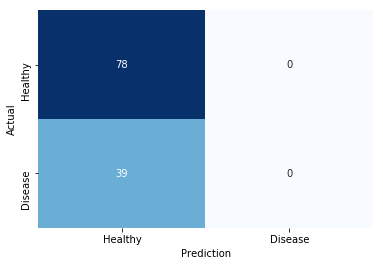

<Figure size 432x288 with 0 Axes>

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
y_test_pred = model.predict_classes(x_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Healthy', 'Disease'], yticklabels=['Healthy', 'Disease'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

## ROC curve

In [ ]:

# Results - ROC Curve
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()
